In [1]:
import scanpy as sc
import squidpy as sq
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
from matplotlib_scalebar.scalebar import ScaleBar
import os

import cell2location
import scvi

DPI = 300
FONTSIZE = 20  # 42
sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

import seaborn as sns
from pathlib import Path

Global seed set to 0


In [2]:
SAMPLE_NAME = "concat_withWu2022"

In [3]:
# DIR2SAVE
DIR2SAVE = Path(
    f"/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2location/{SAMPLE_NAME}/"
)
DIR2SAVE.mkdir(parents=True, exist_ok=True)

In [4]:
run_name = DIR2SAVE.joinpath(f"cell2location_map-no_cycling_TME/")
run_name.mkdir(parents=True, exist_ok=True)

In [5]:
# figures
FIG2SAVE = run_name.joinpath("figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)
# set the global variable: sc.settings.figdir to save all plots
sc.settings.figdir = FIG2SAVE

In [6]:
adata_file = f"{run_name}/sp.h5ad"
adata_vis = sc.read_h5ad(adata_file)
mod = cell2location.models.Cell2location.load(f"{run_name}", adata_vis)

INFO     File /data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/
         cell2location/concat_withWu2022/cell2location_map-no_cycling_TME/model.pt already   
         downloaded                                                                          
INFO     Preparing underlying module for load                                                


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 1/30000:   0%|          | 1/30000 [00:15<128:09:56, 15.38s/it, v_num=1, elbo_train=2.86e+8]


### look at cell type abundance (5% quantile)

In [7]:
# add 5% quantile, representing confident cell abundance, 'at least this amount is present',
# to adata.obs with nice names for plotting
adata_vis.obs[adata_vis.uns["mod"]["factor_names"]] = adata_vis.obsm[
    "q05_cell_abundance_w_sf"
]

In [8]:
adata_vis.obs

,in_tissue,array_row,array_col,Sample,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,...,Treg,Tuft,UPR,cDC1,cDC2,gdT,ipEMT,migDC,pDC,pEMT
spot_id,,,,,,,,,,,,,,,,,,,,,
CRC08_LM_VISIUM_AAACAAGTATCTCCCA-1,1,50,102,CRC08_LM_VISIUM,7893,52062.0,30.025739,42.820099,51.646114,61.620760,...,0.000268,0.000482,0.012999,0.000056,0.000060,0.000401,0.001272,0.000069,0.000206,0.001876
CRC08_LM_VISIUM_AAACCGGAAATGTTAA-1,1,54,124,CRC08_LM_VISIUM,3237,10090.0,33.092170,44.400396,53.468781,65.153617,...,0.000923,0.060726,0.007303,0.000086,0.000112,0.001037,0.308789,0.000355,0.000295,0.334837
CRC08_LM_VISIUM_AAACCGTTCGTCCAGG-1,1,52,42,CRC08_LM_VISIUM,5291,20951.0,29.282612,39.563744,48.837764,60.097370,...,0.000789,0.000807,0.004257,0.000120,0.000030,0.000913,0.004188,0.000205,0.004973,0.000836
CRC08_LM_VISIUM_AAACCTAAGCAGCCGG-1,1,65,83,CRC08_LM_VISIUM,7908,54068.0,24.297181,35.795665,46.572834,59.108900,...,0.000553,0.000071,0.000472,0.000011,0.000011,0.000375,0.001547,0.000056,0.000033,2.112080
CRC08_LM_VISIUM_AAACGAGACGGTTGAT-1,1,35,79,CRC08_LM_VISIUM,1959,5701.0,38.537099,50.798106,59.936853,72.408349,...,0.003242,0.008842,0.007449,0.000241,0.000344,0.002107,0.134352,0.000367,0.000415,0.192628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST_LM_4_TTGTTGTGTGTCAAGA-1,1,31,77,ST_LM_4,2043,4088.0,22.529354,33.023483,43.713307,60.420744,...,0.000653,0.001375,0.010535,0.000135,0.000107,0.000973,0.055422,0.000195,0.000137,0.009039
ST_LM_4_TTGTTTCACATCCAGG-1,1,58,42,ST_LM_4,681,1215.0,37.201646,47.818930,60.411523,85.102881,...,0.000972,0.003104,0.001103,0.000098,0.000293,0.001586,0.001324,0.000196,0.000413,0.002929
ST_LM_4_TTGTTTCATTAGTCTA-1,1,60,30,ST_LM_4,917,1922.0,40.218522,49.687825,60.770031,78.303850,...,0.000485,0.000440,0.000128,0.000104,0.000180,0.000824,0.000079,0.000165,0.000308,0.000506


In [9]:
cell_abundance = adata_vis.obs[[i for i in adata_vis.uns["mod"]["factor_names"]]].copy()

In [10]:
cell_abundance

,B,C1QC Mac,C3 iCAF,CD4 Tfh,CD4 Th,CD4 Th HSP,CD4 Th17,CD4 Tn,CD8 Tem,CD8 Tem GZMB,...,Treg,Tuft,UPR,cDC1,cDC2,gdT,ipEMT,migDC,pDC,pEMT
spot_id,,,,,,,,,,,,,,,,,,,,,
CRC08_LM_VISIUM_AAACAAGTATCTCCCA-1,0.000598,0.000064,0.000022,0.000365,0.000811,0.001681,0.001619,0.000898,0.000907,0.000488,...,0.000268,0.000482,0.012999,0.000056,0.000060,0.000401,0.001272,0.000069,0.000206,0.001876
CRC08_LM_VISIUM_AAACCGGAAATGTTAA-1,0.001441,0.000154,0.000230,0.000748,0.001416,0.001042,0.001674,0.001143,0.001382,0.001960,...,0.000923,0.060726,0.007303,0.000086,0.000112,0.001037,0.308789,0.000355,0.000295,0.334837
CRC08_LM_VISIUM_AAACCGTTCGTCCAGG-1,0.000523,0.000012,0.000092,0.000928,0.000643,0.000923,0.000954,0.000413,0.000868,0.000966,...,0.000789,0.000807,0.004257,0.000120,0.000030,0.000913,0.004188,0.000205,0.004973,0.000836
CRC08_LM_VISIUM_AAACCTAAGCAGCCGG-1,0.000121,0.000042,0.000030,0.000207,0.000356,0.000848,0.000197,0.000366,0.000357,0.000496,...,0.000553,0.000071,0.000472,0.000011,0.000011,0.000375,0.001547,0.000056,0.000033,2.112080
CRC08_LM_VISIUM_AAACGAGACGGTTGAT-1,0.001991,0.000158,0.000912,0.002296,0.002224,0.002558,0.003562,0.004195,0.002283,0.002148,...,0.003242,0.008842,0.007449,0.000241,0.000344,0.002107,0.134352,0.000367,0.000415,0.192628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST_LM_4_TTGTTGTGTGTCAAGA-1,0.000969,0.000169,0.000133,0.000589,0.000664,0.001596,0.000748,0.000670,0.000911,0.000945,...,0.000653,0.001375,0.010535,0.000135,0.000107,0.000973,0.055422,0.000195,0.000137,0.009039
ST_LM_4_TTGTTTCACATCCAGG-1,0.000747,0.011145,0.314606,0.000970,0.001147,0.001217,0.001650,0.001089,0.001207,0.001609,...,0.000972,0.003104,0.001103,0.000098,0.000293,0.001586,0.001324,0.000196,0.000413,0.002929
ST_LM_4_TTGTTTCATTAGTCTA-1,0.000319,0.002629,0.286931,0.000438,0.000617,0.000612,0.001037,0.000467,0.000579,0.000703,...,0.000485,0.000440,0.000128,0.000104,0.000180,0.000824,0.000079,0.000165,0.000308,0.000506


In [11]:
cell_abundance.max(axis=0)

B                     7.686192
C1QC Mac              8.452051
C3 iCAF               5.781144
CD4 Tfh               3.441146
CD4 Th                1.699685
CD4 Th HSP            0.543085
CD4 Th17              4.348102
CD4 Tn                3.047204
CD8 Tem               2.444069
CD8 Tem GZMB          4.304848
CD8 Tem HSP           0.319063
CD8 Tex               1.169461
Cholangiocyte         5.572304
Colonocyte            3.104326
ECM CAF               5.190687
Enteroendocrine       1.317761
FCN1 Mono             1.109922
Goblet                1.314739
HSP Mono              2.401055
Hepatocyte           22.176562
Hypoxia               3.647679
IL1B Mac              1.730257
Intermediate          2.828722
Kupffer               3.641357
Lymphatic endo        3.225292
MAIT                  1.697647
Mast                  0.999963
Myofibroblast         2.909358
NK1                   0.694317
NK2                   0.834207
NKT                   0.308900
NLRP3 Mac             1.539511
Neutroph

In [12]:
# normalise cell abundance per spot by max value
# scaled between 0 and 1 by normalising by the maximum value of each cell type across spots
cell_abundance_spot_norm = cell_abundance / cell_abundance.max(axis=0)

In [13]:
cell_abundance_spot_norm

,B,C1QC Mac,C3 iCAF,CD4 Tfh,CD4 Th,CD4 Th HSP,CD4 Th17,CD4 Tn,CD8 Tem,CD8 Tem GZMB,...,Treg,Tuft,UPR,cDC1,cDC2,gdT,ipEMT,migDC,pDC,pEMT
spot_id,,,,,,,,,,,,,,,,,,,,,
CRC08_LM_VISIUM_AAACAAGTATCTCCCA-1,0.000078,0.000008,0.000004,0.000106,0.000477,0.003096,0.000372,0.000295,0.000371,0.000113,...,0.000186,0.000547,0.003214,0.000047,0.000022,0.000148,0.000831,0.000034,0.000205,0.000560
CRC08_LM_VISIUM_AAACCGGAAATGTTAA-1,0.000187,0.000018,0.000040,0.000217,0.000833,0.001919,0.000385,0.000375,0.000565,0.000455,...,0.000640,0.068876,0.001806,0.000073,0.000041,0.000383,0.201689,0.000176,0.000294,0.099873
CRC08_LM_VISIUM_AAACCGTTCGTCCAGG-1,0.000068,0.000001,0.000016,0.000270,0.000378,0.001700,0.000219,0.000136,0.000355,0.000224,...,0.000547,0.000916,0.001052,0.000102,0.000011,0.000337,0.002735,0.000101,0.004951,0.000249
CRC08_LM_VISIUM_AAACCTAAGCAGCCGG-1,0.000016,0.000005,0.000005,0.000060,0.000209,0.001562,0.000045,0.000120,0.000146,0.000115,...,0.000384,0.000081,0.000117,0.000009,0.000004,0.000138,0.001010,0.000028,0.000033,0.629974
CRC08_LM_VISIUM_AAACGAGACGGTTGAT-1,0.000259,0.000019,0.000158,0.000667,0.001309,0.004711,0.000819,0.001377,0.000934,0.000499,...,0.002248,0.010029,0.001842,0.000204,0.000125,0.000777,0.087753,0.000181,0.000413,0.057456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST_LM_4_TTGTTGTGTGTCAAGA-1,0.000126,0.000020,0.000023,0.000171,0.000391,0.002938,0.000172,0.000220,0.000373,0.000220,...,0.000453,0.001559,0.002605,0.000114,0.000039,0.000359,0.036199,0.000096,0.000136,0.002696
ST_LM_4_TTGTTTCACATCCAGG-1,0.000097,0.001319,0.054419,0.000282,0.000675,0.002241,0.000380,0.000357,0.000494,0.000374,...,0.000674,0.003520,0.000273,0.000083,0.000106,0.000585,0.000865,0.000097,0.000411,0.000874
ST_LM_4_TTGTTTCATTAGTCTA-1,0.000042,0.000311,0.049632,0.000127,0.000363,0.001127,0.000238,0.000153,0.000237,0.000163,...,0.000336,0.000499,0.000032,0.000088,0.000065,0.000304,0.000051,0.000082,0.000306,0.000151


In [14]:
adata_vis.obs.Sample

spot_id
CRC08_LM_VISIUM_AAACAAGTATCTCCCA-1    CRC08_LM_VISIUM
CRC08_LM_VISIUM_AAACCGGAAATGTTAA-1    CRC08_LM_VISIUM
CRC08_LM_VISIUM_AAACCGTTCGTCCAGG-1    CRC08_LM_VISIUM
CRC08_LM_VISIUM_AAACCTAAGCAGCCGG-1    CRC08_LM_VISIUM
CRC08_LM_VISIUM_AAACGAGACGGTTGAT-1    CRC08_LM_VISIUM
                                           ...       
ST_LM_4_TTGTTGTGTGTCAAGA-1                    ST_LM_4
ST_LM_4_TTGTTTCACATCCAGG-1                    ST_LM_4
ST_LM_4_TTGTTTCATTAGTCTA-1                    ST_LM_4
ST_LM_4_TTGTTTCCATACAACT-1                    ST_LM_4
ST_LM_4_TTGTTTGTATTACACG-1                    ST_LM_4
Name: Sample, Length: 16119, dtype: category
Categories (6, object): ['CRC08_LM_VISIUM', 'CRC09_LM_VISIUM', 'CRC11_LM_VISIUM', 'P3_liver', 'P13_Liver_ST', 'ST_LM_4']

In [15]:
adata_vis.uns

OverloadedDict, wrapping:
	{'Sample_name_colors': array(['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f'],
      dtype=object), '_scvi_manager_uuid': '2f96c561-173f-46ea-a4fd-2e595fed0966', '_scvi_uuid': '5a913691-3fc4-4cc1-916b-63be02a389ae', 'mod': {'date': '2023-05-31', 'factor_filter': array([], dtype=float64), 'factor_names': array(['B', 'C1QC Mac', 'C3 iCAF', 'CD4 Tfh', 'CD4 Th', 'CD4 Th HSP',
       'CD4 Th17', 'CD4 Tn', 'CD8 Tem', 'CD8 Tem GZMB', 'CD8 Tem HSP',
       'CD8 Tex', 'Cholangiocyte', 'Colonocyte', 'ECM CAF',
       'Enteroendocrine', 'FCN1 Mono', 'Goblet', 'HSP Mono', 'Hepatocyte',
       'Hypoxia', 'IL1B Mac', 'Intermediate', 'Kupffer', 'Lymphatic endo',
       'MAIT', 'Mast', 'Myofibroblast', 'NK1', 'NK2', 'NKT', 'NLRP3 Mac',
       'Neutrophil', 'PLTP LYVE1 Mac', 'Pericyte', 'Plasma', 'SEC', 'SMC',
       'SPP1 Mac', 'Stalk-like endo', 'Stem', 'Stem (NOTUM high)', 'TA1',
       'TA2', 'Tip-like endo', 'Treg', 'Tuft', 'UPR', 'cDC1', 'cDC2',
      

In [16]:
adata_vis.uns["Sample_name_colors"]

array(['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f'],
      dtype=object)

In [17]:
# map samples to colors for spots
color_dict = dict(
    zip(adata_vis.obs.Sample.cat.categories.values, adata_vis.uns["Sample_name_colors"])
)
color_dict

{'CRC08_LM_VISIUM': '#66c2a5',
 'CRC09_LM_VISIUM': '#fc8d62',
 'CRC11_LM_VISIUM': '#8da0cb',
 'P3_liver': '#e78ac3',
 'P13_Liver_ST': '#a6d854',
 'ST_LM_4': '#ffd92f'}

In [18]:
# copy segmentation labels so we can add them as color to plot
cell_abundance_spot_norm = cell_abundance_spot_norm.merge(
    adata_vis.obs["Sample"], how="inner", left_index=True, right_index=True
)
cell_abundance_spot_norm

,B,C1QC Mac,C3 iCAF,CD4 Tfh,CD4 Th,CD4 Th HSP,CD4 Th17,CD4 Tn,CD8 Tem,CD8 Tem GZMB,...,Tuft,UPR,cDC1,cDC2,gdT,ipEMT,migDC,pDC,pEMT,Sample
spot_id,,,,,,,,,,,,,,,,,,,,,
CRC08_LM_VISIUM_AAACAAGTATCTCCCA-1,0.000078,0.000008,0.000004,0.000106,0.000477,0.003096,0.000372,0.000295,0.000371,0.000113,...,0.000547,0.003214,0.000047,0.000022,0.000148,0.000831,0.000034,0.000205,0.000560,CRC08_LM_VISIUM
CRC08_LM_VISIUM_AAACCGGAAATGTTAA-1,0.000187,0.000018,0.000040,0.000217,0.000833,0.001919,0.000385,0.000375,0.000565,0.000455,...,0.068876,0.001806,0.000073,0.000041,0.000383,0.201689,0.000176,0.000294,0.099873,CRC08_LM_VISIUM
CRC08_LM_VISIUM_AAACCGTTCGTCCAGG-1,0.000068,0.000001,0.000016,0.000270,0.000378,0.001700,0.000219,0.000136,0.000355,0.000224,...,0.000916,0.001052,0.000102,0.000011,0.000337,0.002735,0.000101,0.004951,0.000249,CRC08_LM_VISIUM
CRC08_LM_VISIUM_AAACCTAAGCAGCCGG-1,0.000016,0.000005,0.000005,0.000060,0.000209,0.001562,0.000045,0.000120,0.000146,0.000115,...,0.000081,0.000117,0.000009,0.000004,0.000138,0.001010,0.000028,0.000033,0.629974,CRC08_LM_VISIUM
CRC08_LM_VISIUM_AAACGAGACGGTTGAT-1,0.000259,0.000019,0.000158,0.000667,0.001309,0.004711,0.000819,0.001377,0.000934,0.000499,...,0.010029,0.001842,0.000204,0.000125,0.000777,0.087753,0.000181,0.000413,0.057456,CRC08_LM_VISIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST_LM_4_TTGTTGTGTGTCAAGA-1,0.000126,0.000020,0.000023,0.000171,0.000391,0.002938,0.000172,0.000220,0.000373,0.000220,...,0.001559,0.002605,0.000114,0.000039,0.000359,0.036199,0.000096,0.000136,0.002696,ST_LM_4
ST_LM_4_TTGTTTCACATCCAGG-1,0.000097,0.001319,0.054419,0.000282,0.000675,0.002241,0.000380,0.000357,0.000494,0.000374,...,0.003520,0.000273,0.000083,0.000106,0.000585,0.000865,0.000097,0.000411,0.000874,ST_LM_4
ST_LM_4_TTGTTTCATTAGTCTA-1,0.000042,0.000311,0.049632,0.000127,0.000363,0.001127,0.000238,0.000153,0.000237,0.000163,...,0.000499,0.000032,0.000088,0.000065,0.000304,0.000051,0.000082,0.000306,0.000151,ST_LM_4


In [19]:
# create colors pd.Series based on segmentation region and associated color
colors_sample_spot = cell_abundance_spot_norm.Sample.map(color_dict)

### clustermap: look at cell type colocalisation, generate a matrix scaled cell type abundances per spots to see "modules" of cell types that co-occur

/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


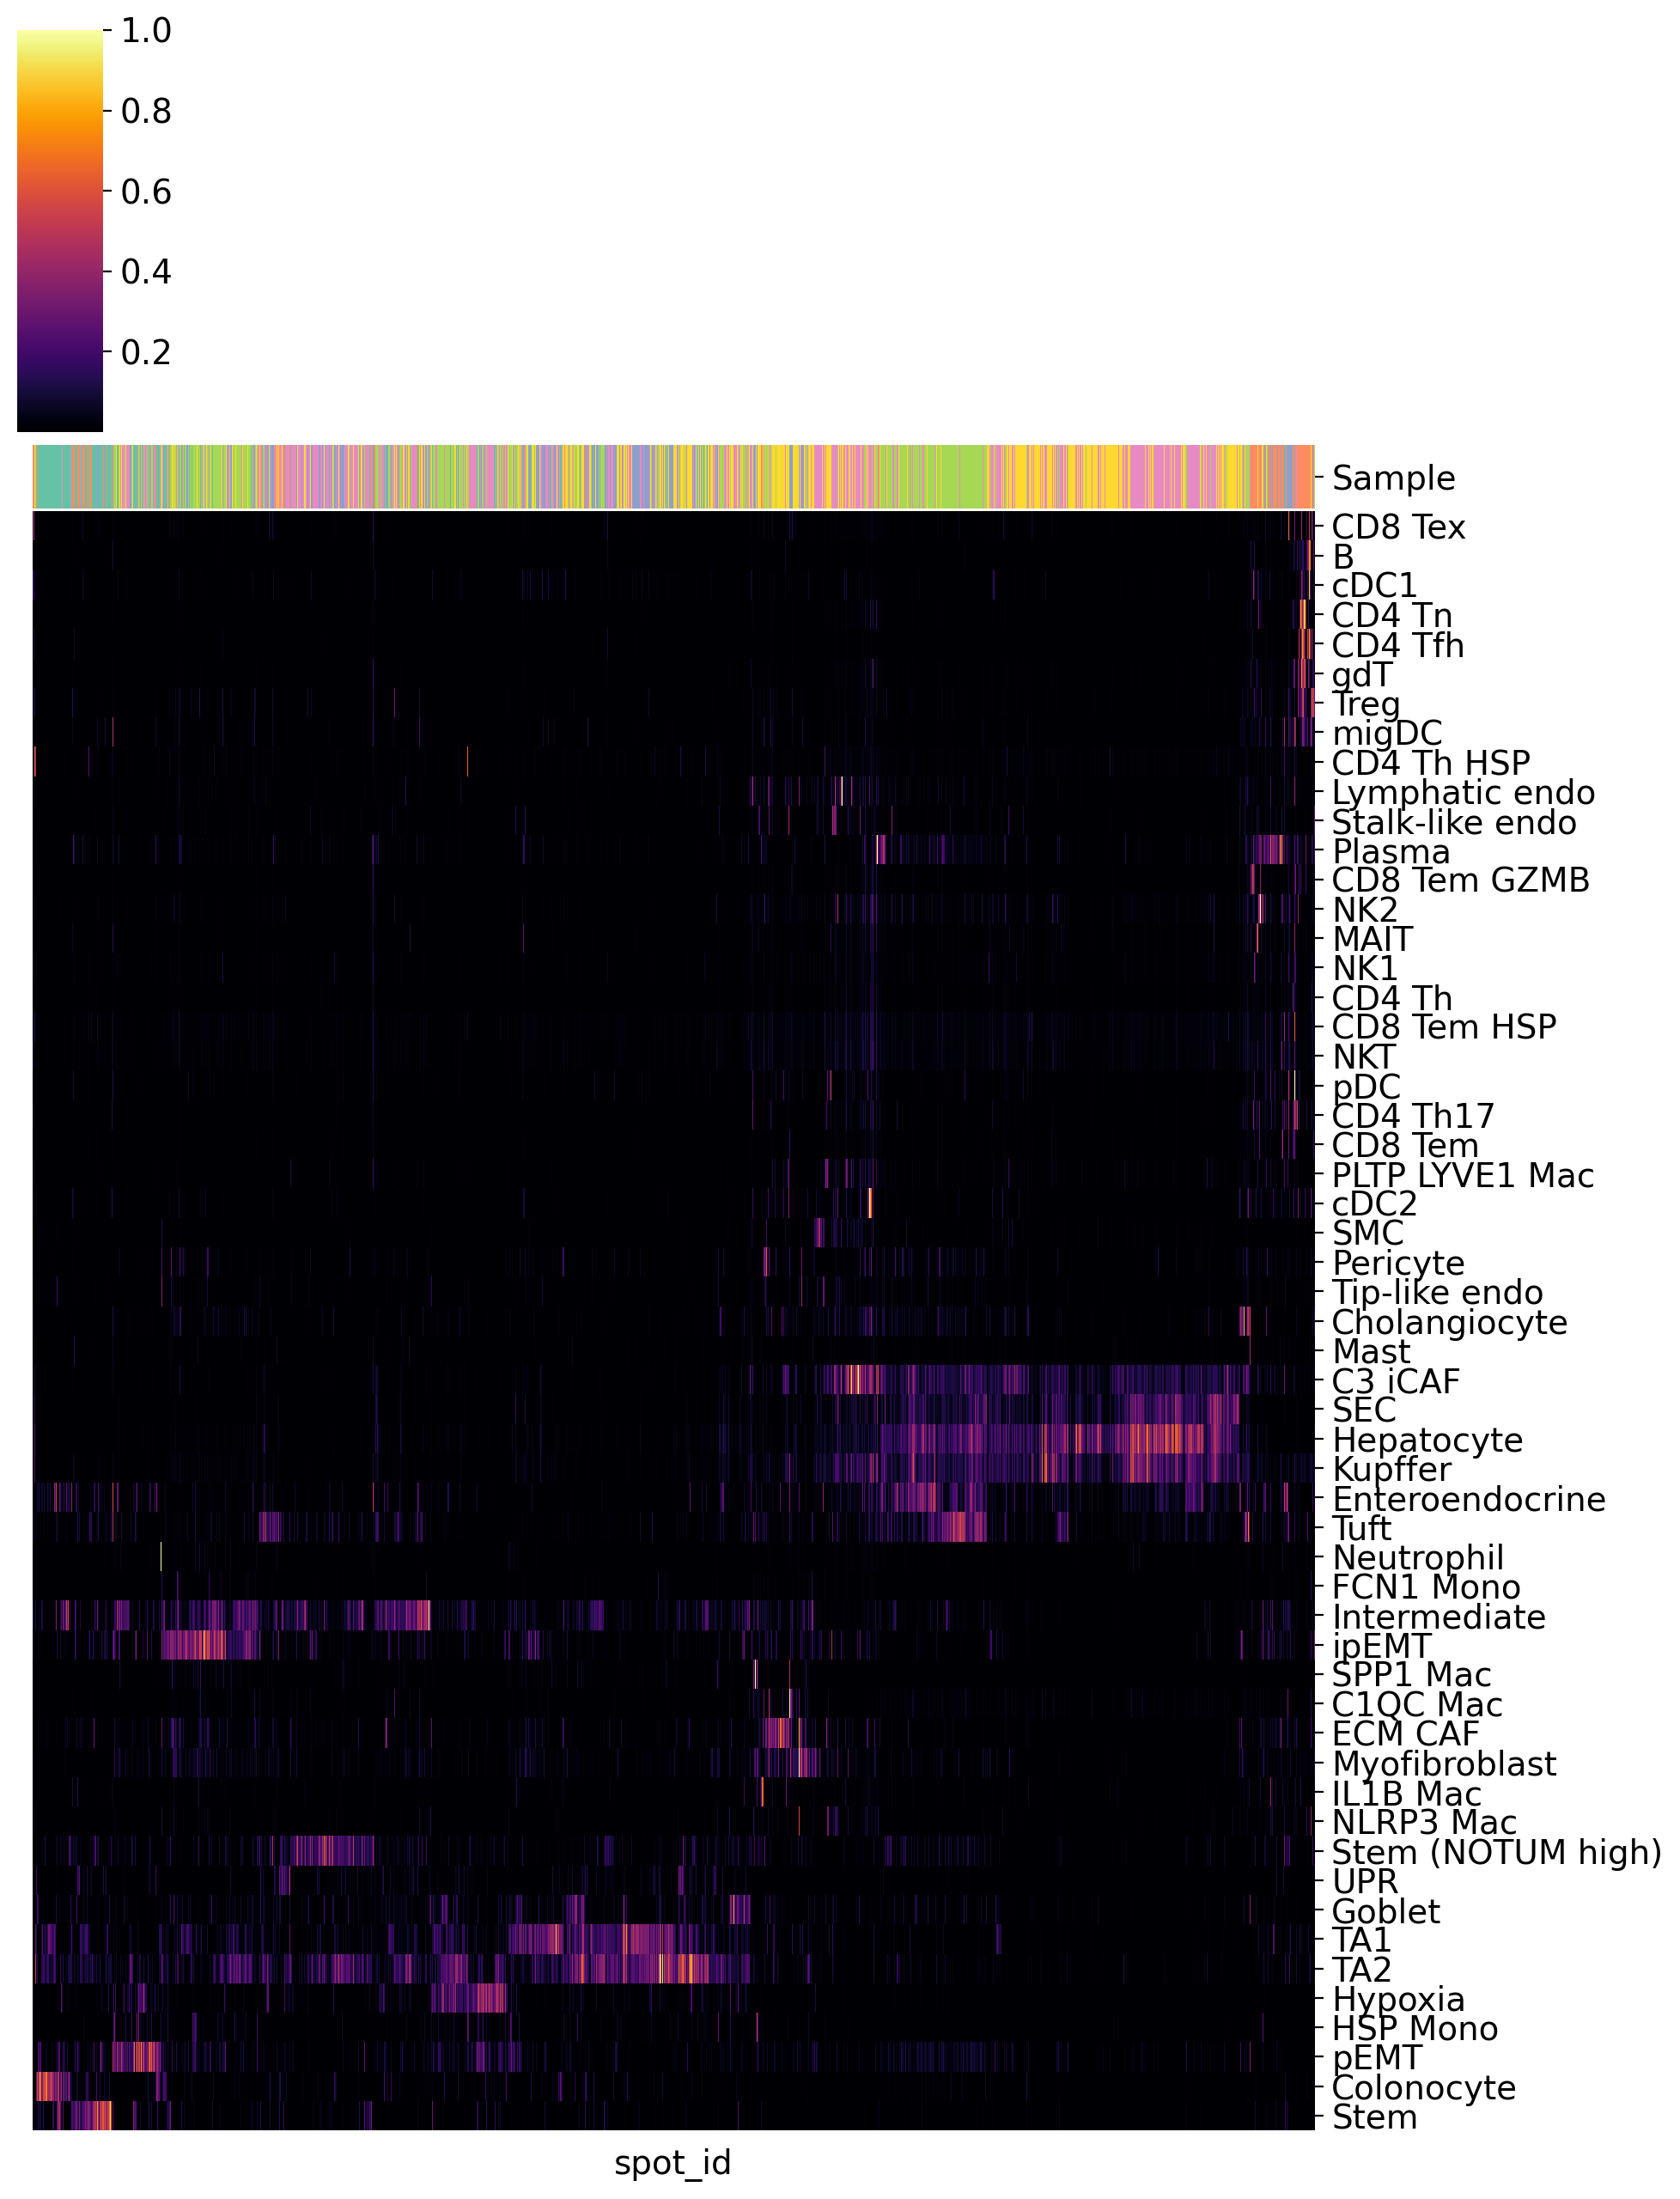

In [20]:
g = sns.clustermap(
    cell_abundance_spot_norm[[i for i in adata_vis.uns["mod"]["factor_names"]]].T,
    method="average",  # linkage method “single” linkage strategy
    xticklabels=False,
    yticklabels=True,
    dendrogram_ratio=(0.01, 0.2),
    metric="correlation",
    col_colors=colors_sample_spot,
    figsize=(10,13),
    cmap="inferno" # mako magma
    # cbar_kws=color_dict,
)
g.ax_row_dendrogram.set_visible(False)  # suppress row dendrogram
g.ax_col_dendrogram.set_visible(False)  # suppress column dendrogram

plt.savefig(
        FIG2SAVE.joinpath(f"{SAMPLE_NAME}_heatmap_average_mixed.png"),
        dpi=DPI,
        format="png",
        facecolor="w",
        transparent=True,
        edgecolor="w",
        bbox_inches="tight") 

/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


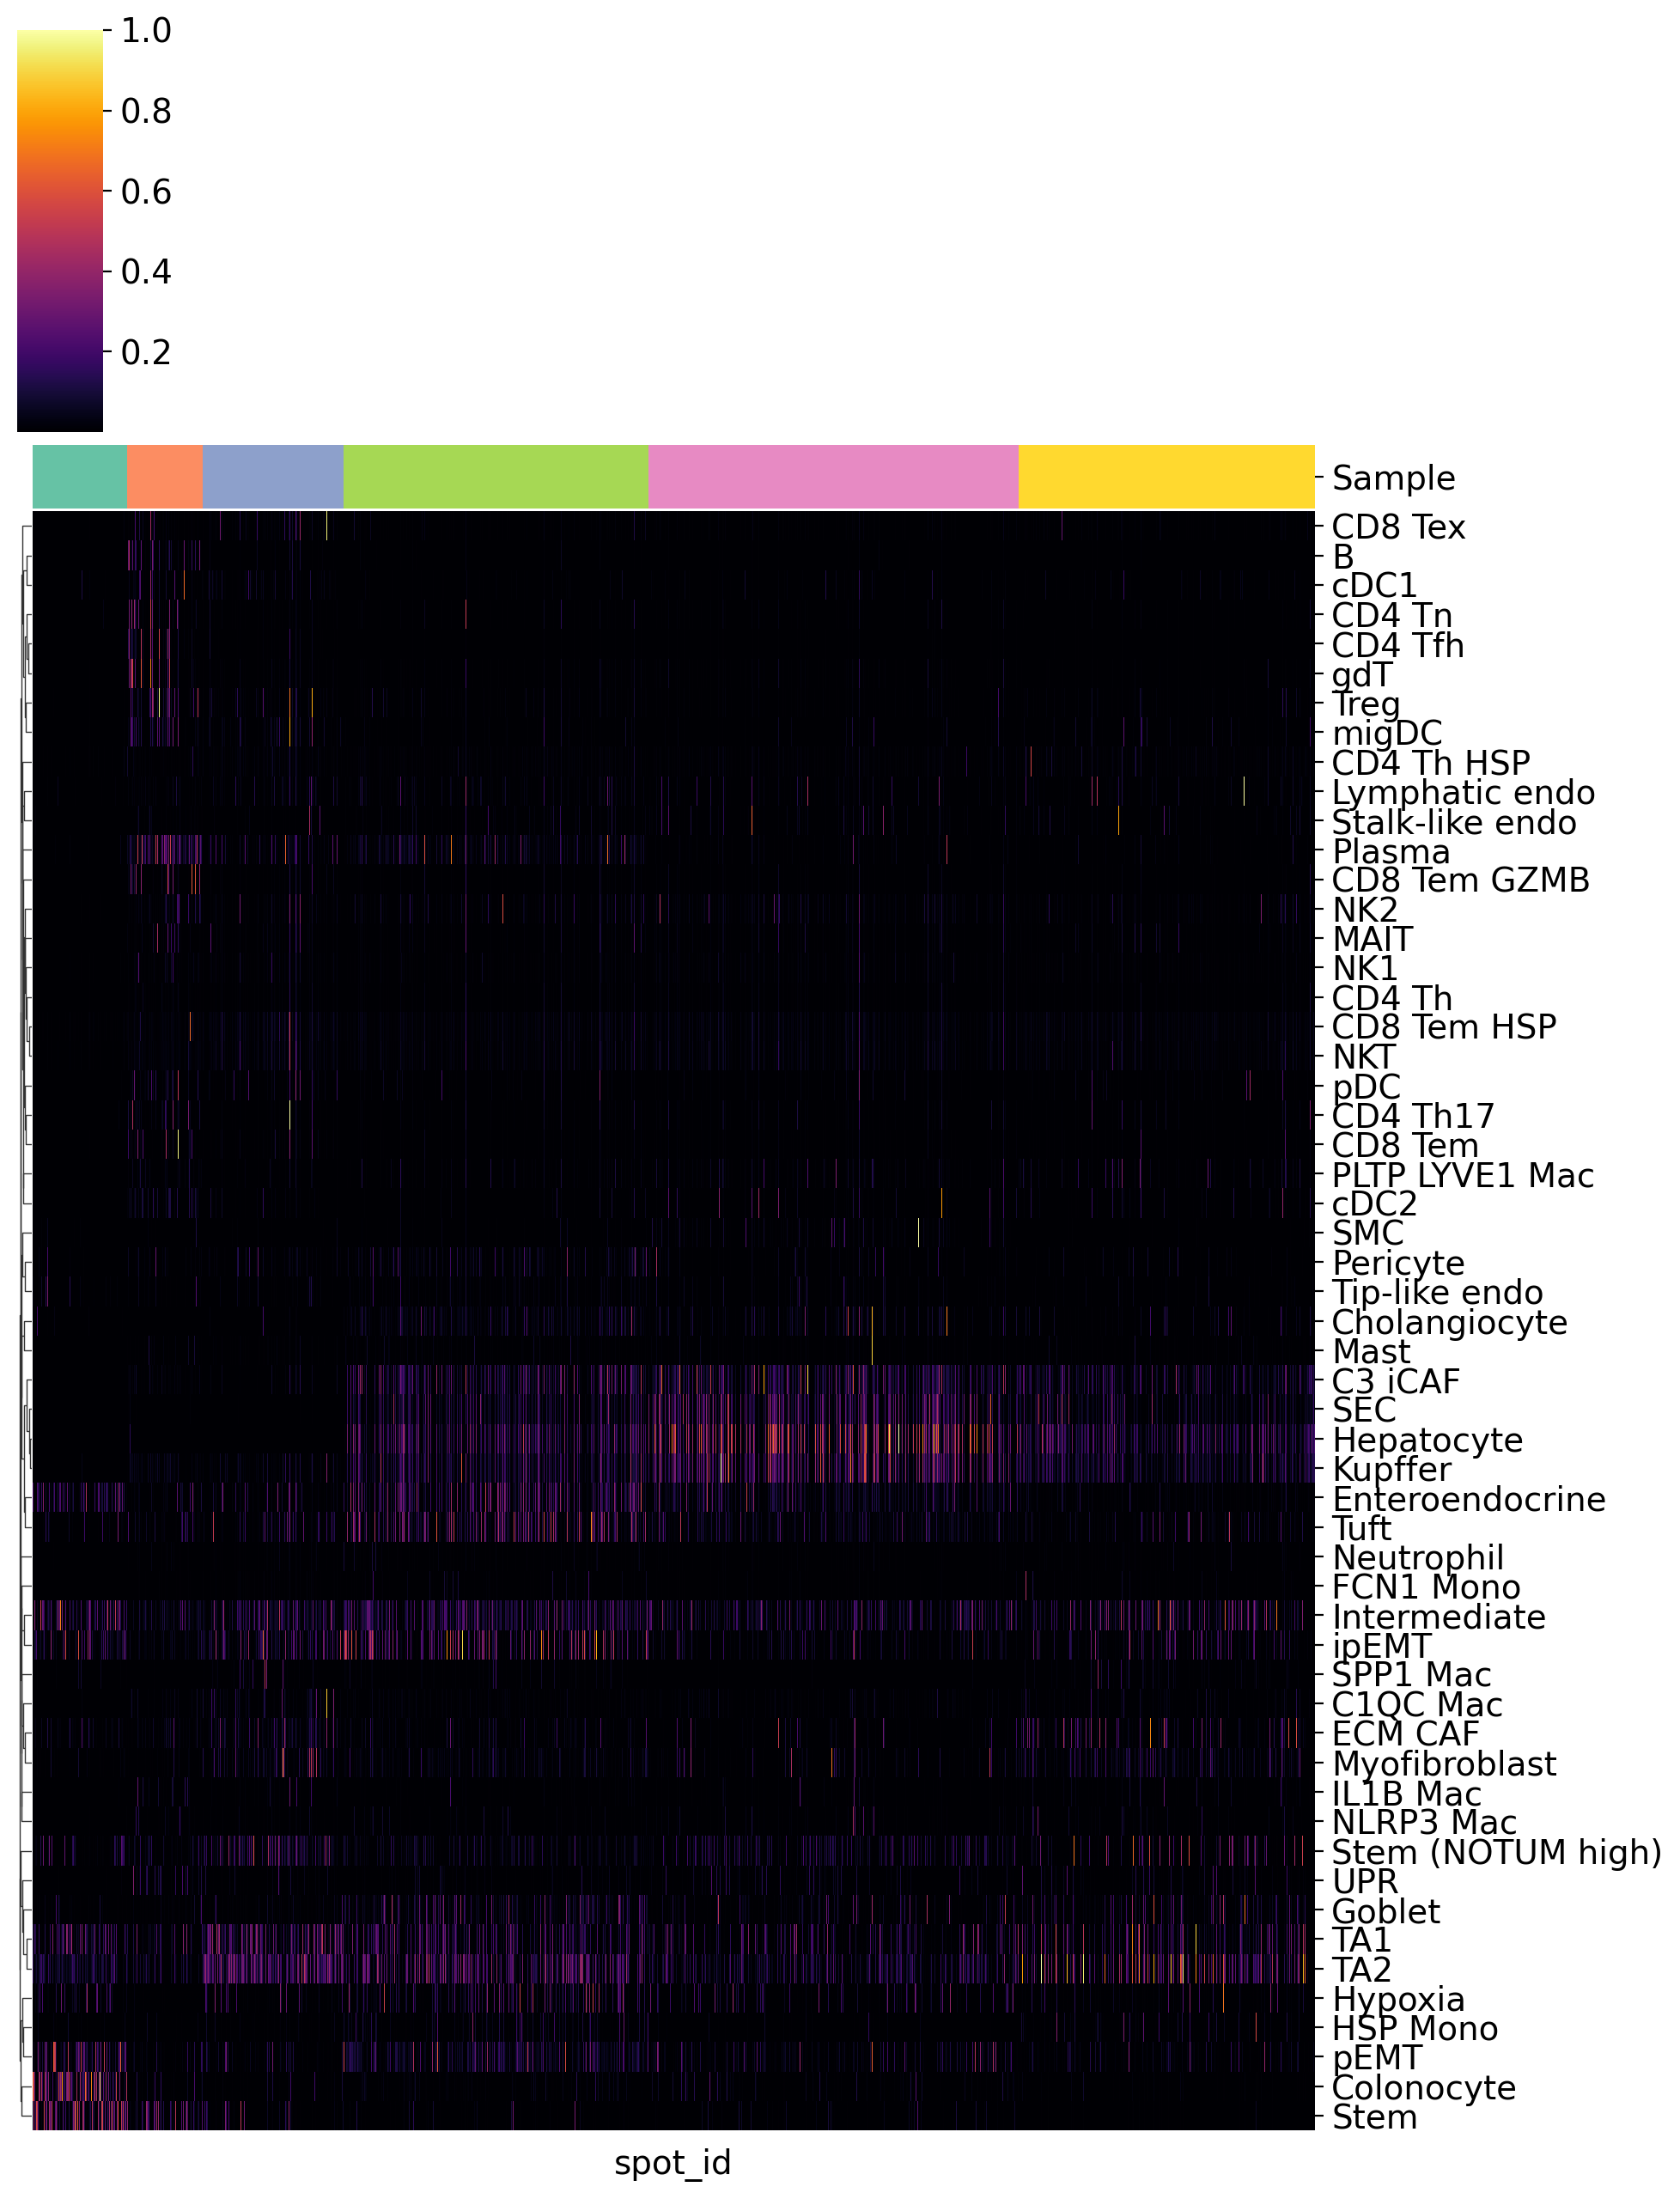

In [21]:
g = sns.clustermap(
    cell_abundance_spot_norm[[i for i in adata_vis.uns["mod"]["factor_names"]]].T,
    method="average",  # linkage method “single” linkage strategy
    xticklabels=False,
    yticklabels=True,
    dendrogram_ratio=(0.01, 0.2),
    metric="correlation",
    col_colors=colors_sample_spot,
    col_cluster=False,
    figsize=(10,13),
    cmap="inferno" # mako magma
    # cbar_kws=color_dict,
)
# g.ax_row_dendrogram.set_visible(False) #suppress row dendrogram
# g.ax_col_dendrogram.set_visible(False) #suppress column dendrogram

plt.savefig(
        FIG2SAVE.joinpath(f"{SAMPLE_NAME}_heatmap_average_persample.png"),
        dpi=DPI,
        format="png",
        facecolor="w",
        transparent=True,
        edgecolor="w",
        bbox_inches="tight") 

/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


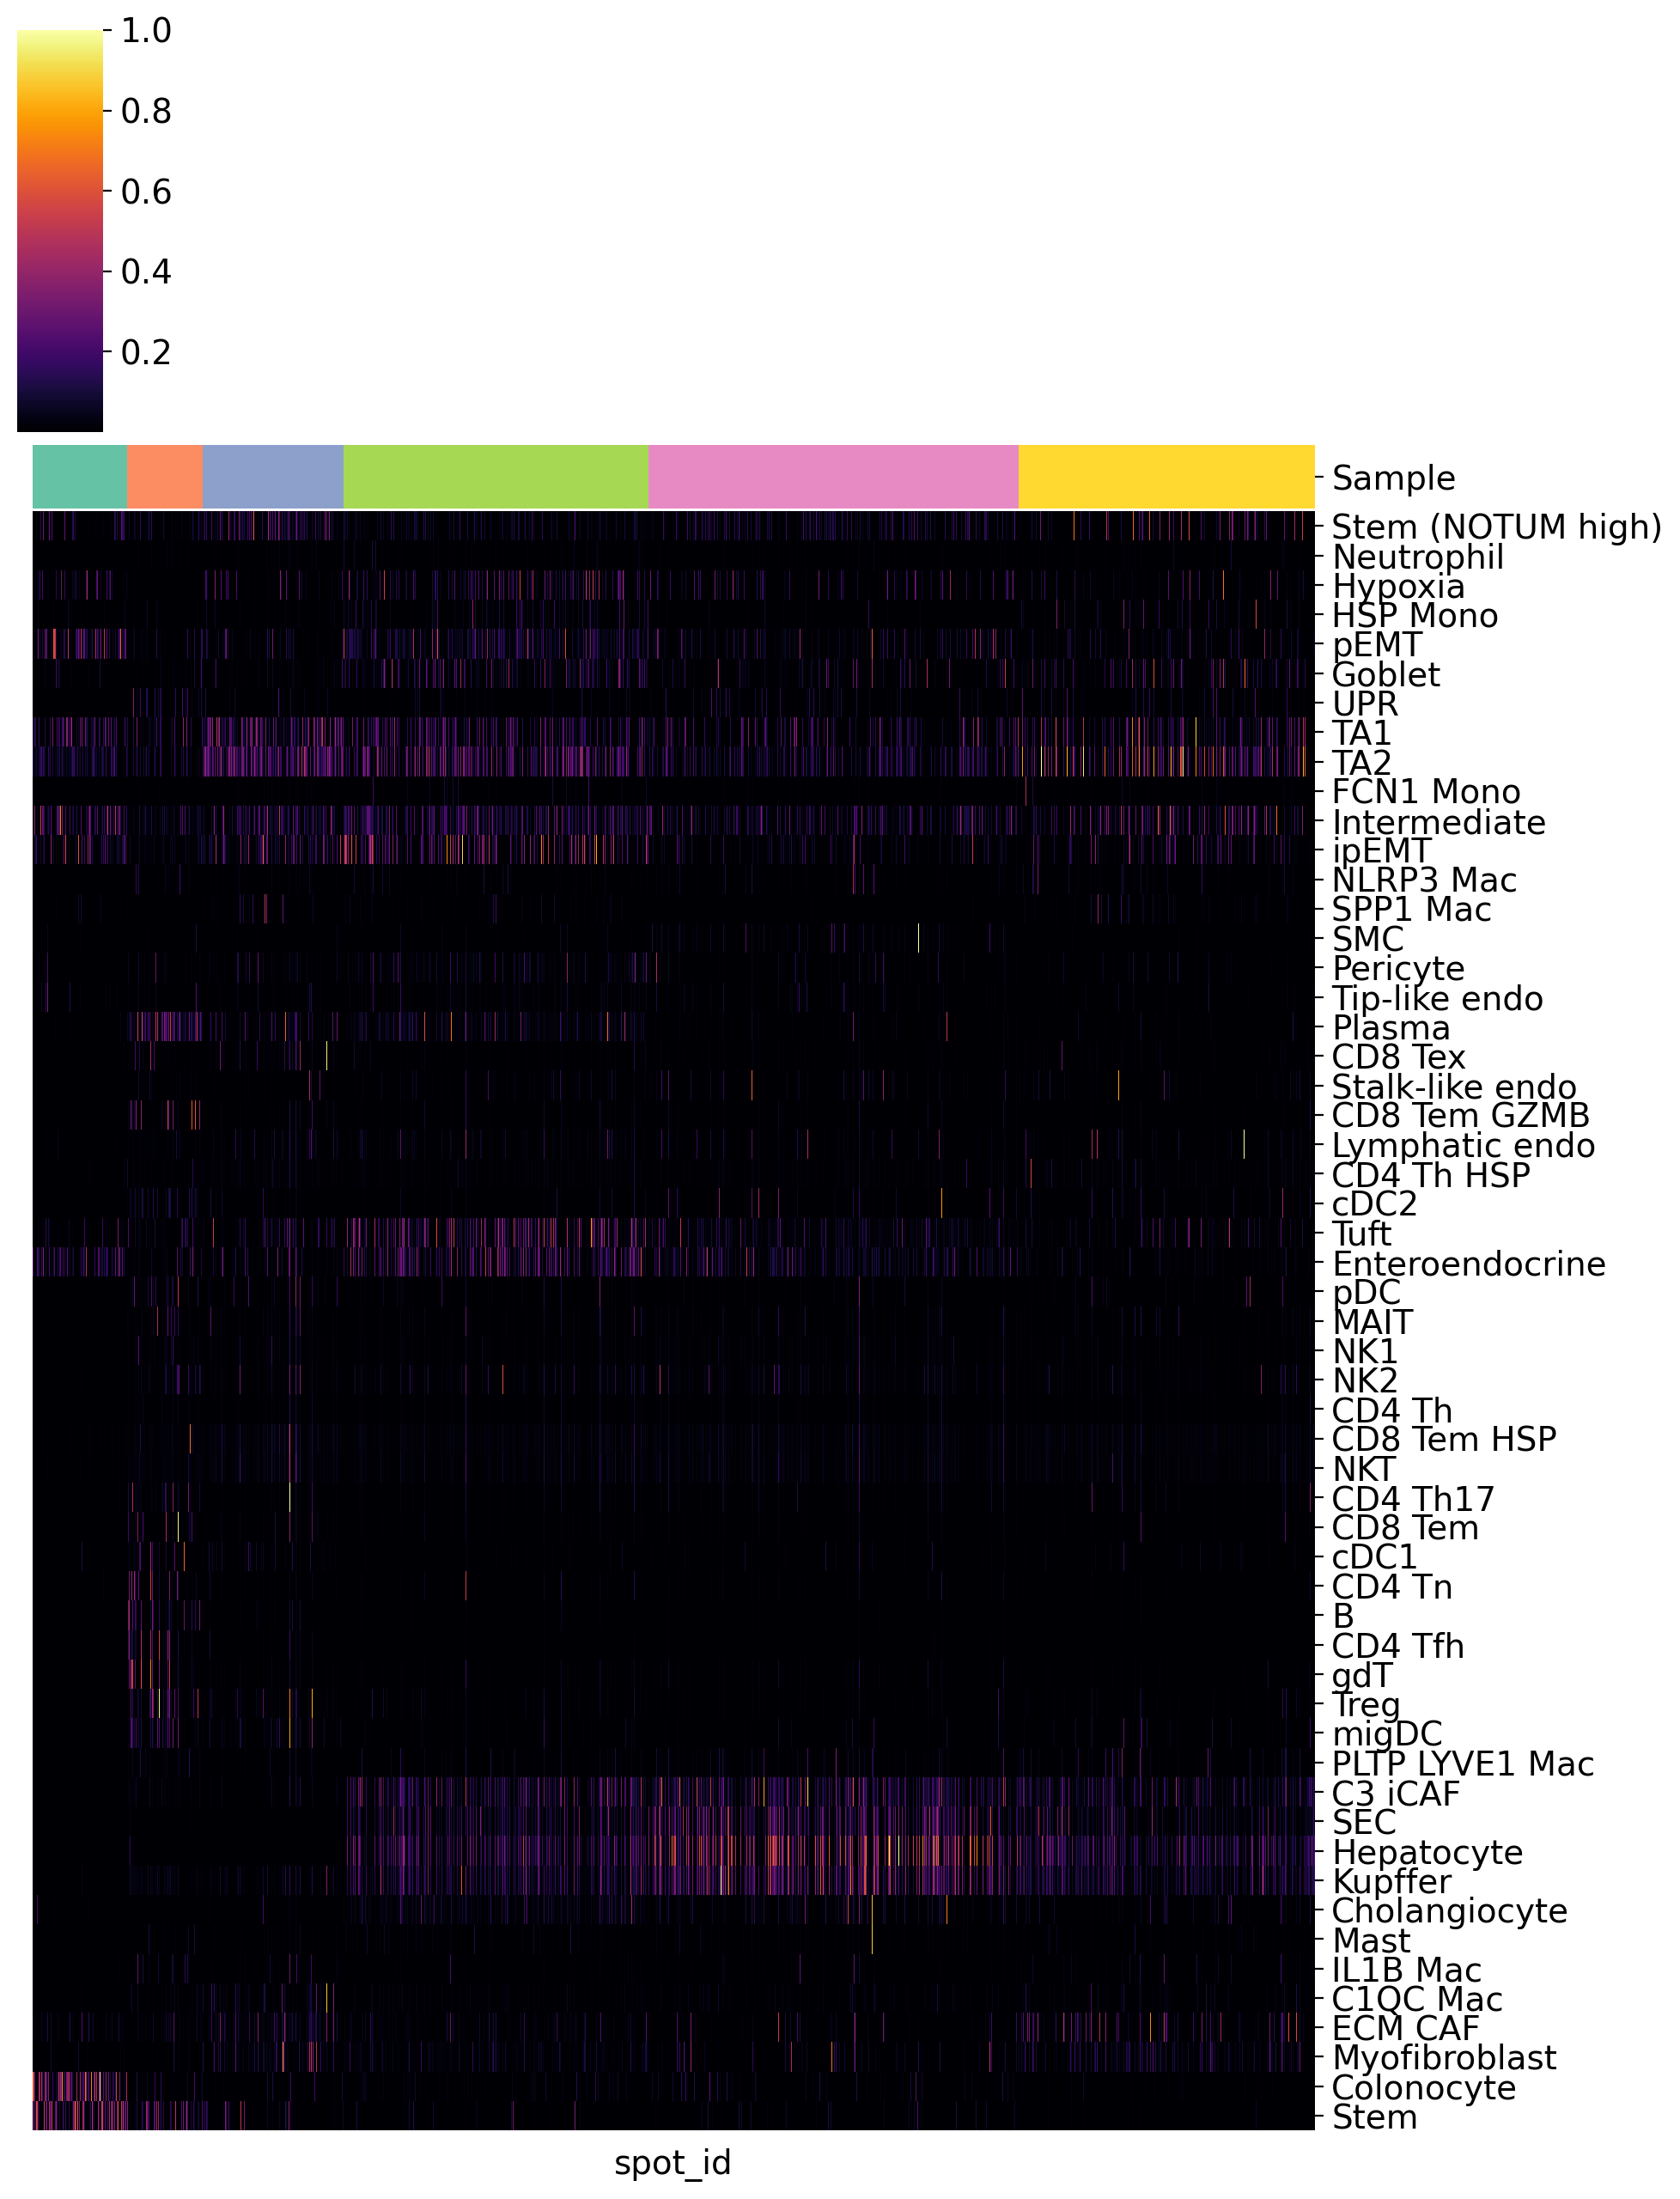

In [22]:
g = sns.clustermap(
    cell_abundance_spot_norm[[i for i in adata_vis.uns["mod"]["factor_names"]]].T,
    method="single",  # linkage method “single” linkage strategy
    xticklabels=False,
    yticklabels=True,
    dendrogram_ratio=(0.01, 0.2),
    metric="correlation",
    col_colors=colors_sample_spot,
    col_cluster=False,
    row_cluster=True,
    figsize=(10,13),
    cmap="inferno" # mako magma
    # cbar_kws=color_dict,
)
g.ax_row_dendrogram.set_visible(False)  # suppress row dendrogram
g.ax_col_dendrogram.set_visible(False)  # suppress column dendrogram

plt.savefig(
        FIG2SAVE.joinpath(f"{SAMPLE_NAME}_heatmap_single_persample.png"),
        dpi=DPI,
        format="png",
        facecolor="w",
        transparent=True,
        edgecolor="w",
        bbox_inches="tight") 

In [23]:
def plot_patch(labels, colors):
    patches = []
    for i in colors:
        (patch,) = plt.plot(
            [],
            "s",
            c=i,
            markeredgewidth=3,
            markersize=7.5,
        )
        patches.append(patch)
    plt.legend(patches, labels, frameon=False)

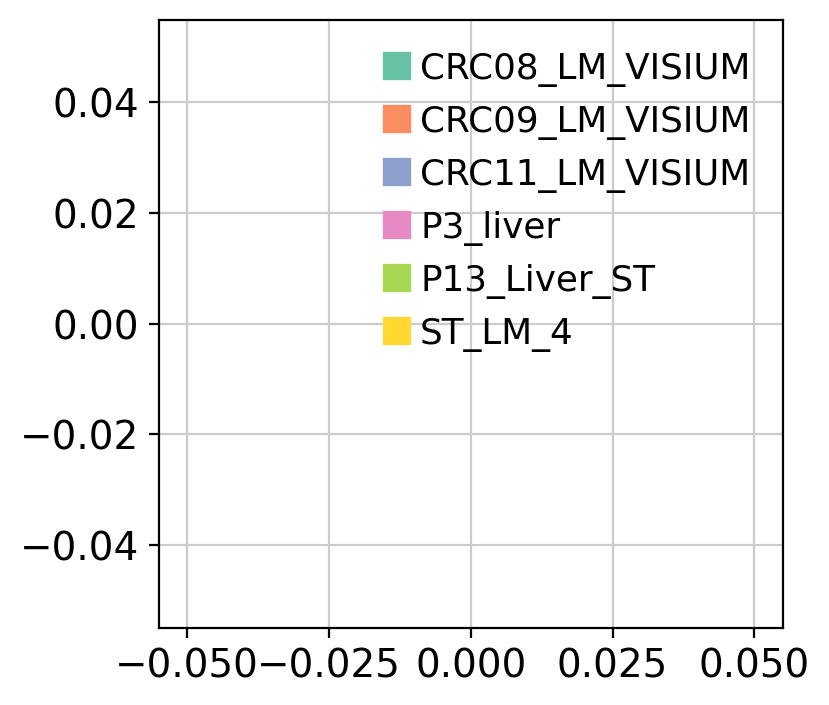

In [24]:
color_dict
mouse_legend_colors = color_dict.values()
mouse_legend_labels = color_dict.keys()
plot_patch(mouse_legend_labels, mouse_legend_colors)
# plt.savefig(f'{fig_path}FigS10/FigS10_mouse_colorbar.pdf', bbox_inches='tight')